## Weil wir viel mit [LangChain](https://python.langchain.com/docs/get_started/introduction) arbeiten werden

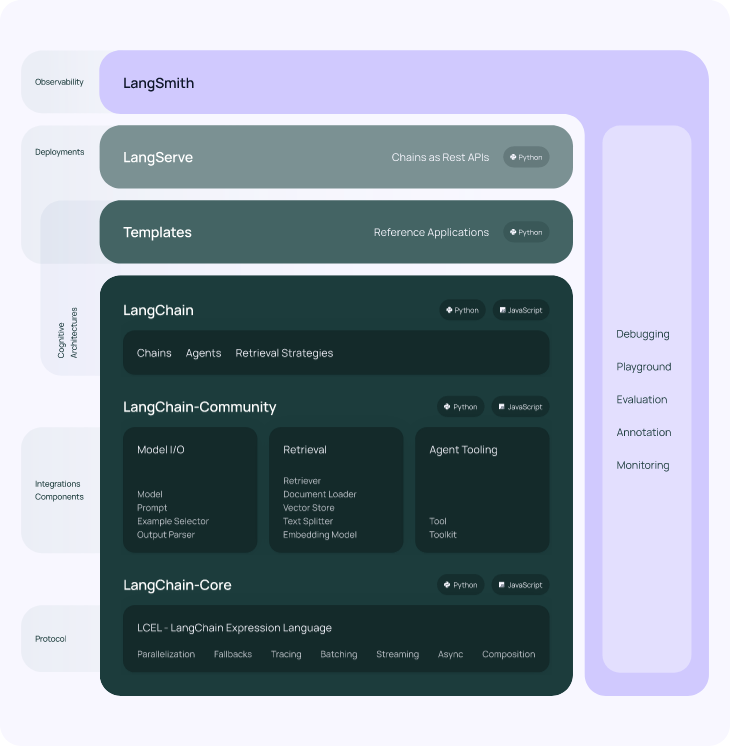

Warum erwähnen wir das?

Damit man von den ganzen Imports nicht verwirrt ist und sich nicht schwer tut, die richtigen Sachen zu finden.

## langchain_core

beinhaltet die Interfaces, abstrakte Klassen und die Basisfunktionalität. Der **core** von LangChain. 

In [1]:
# Der chain-Decorator hat einen ungünstigen Namen. Eigentlich macht er aus einer Funktion eine Runnable, keine Chain. Davon nicht verwirren lassen.
from langchain_core.runnables import chain

@chain
def simple_printer(name :str):
     return f"Hello {name}"

@chain
def simple_printer_2(text :str):
    return f"Goodbye {text}"

# Runnables kann man "invoken"
print(simple_printer.invoke("Würzburg"))
# Runnables kann man "batchen"
print(simple_printer.batch(["Würzburg", "München"]))

# Runnables kann man "chainen"
simple_chain = simple_printer | simple_printer_2

print(simple_chain.invoke("Würzburg"))

Hello Würzburg
['Hello Würzburg', 'Hello München']
Goodbye Hello Würzburg


## langchain

beinhaltet vorgefertigte und teilweise komplexe Chains und Anwendungen, die man einfach benutzen kann.

Chains hier drin veralten genau so schnell, wie neue entstehen. Recht viel Bewegung im Repo.

Auch solche Dinge wie den Hub findet man im "normalen" langchain-Repo

In [2]:
from langchain.chains.sql_database.query import create_sql_query_chain
from dotenv import load_dotenv
from langchain import hub

load_dotenv()

prompt = hub.pull("reactagent/openai-functions-agent")
print(prompt)

input_variables=['agent_scratchpad', 'input'] input_types={'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]} metadata={'lc_hub_owner': 'reactagent', 'lc_hub_repo': 'openai-functions-agent', 'lc_hub_commit_hash': 'ee0d19c1f8a06027f81a878d66e4c55ae1fcd2a482d72a78bb58e0bec5135873'} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful assistant')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}')), MessagesPlaceholder(variable_name='agent_scratchpad')]


## langchain_community

beinhaltet Integrationen von Datenbanken, LLM-Providern, etc etc

langchain_\<partner_blabliblub\> ist die Integration des Partners partner_blabliblub . Diese Repos sind in der Regel sehr gut gepflegt. Beispiele sind OpenAI, Mistral, Groq, robocorp etc etc...

In [3]:
from langchain_community.vectorstores.pgvector import PGVector
from langchain_openai import ChatOpenAI

## langgraph

enthält langgraph

In [4]:
from langgraph.prebuilt import create_agent_executor

## langserve

enthält Code, der es Einsteigern erleichtert, eine Applikation als Fast-API an die Außenwelt anbinden zu können

In [5]:
from langserve import add_routes